# Import Required Libraries


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the  Data
# If the data is in an Excel file, convert it to CSV or load it directly:    
df = pd.read_excel('/Users/kavyadeepak/Downloads/Financial_report.xlsx')  # If using Excel
# OR
df = pd.read_csv('/Users/kavyadeepak/Downloads/Financial_report.csv') # If already converted

In [3]:
df = pd.read_csv('/Users/kavyadeepak/Downloads/Financial_report.csv')


# Exploring the Data before proceeding with analysis, checking the first few rows to understand the structure

In [5]:
df.head()

,Year,Total Revenue,Net Income,Total assets,Liabilities,Cash Flow from Operating Activities.,company
0,2024,245122000000,88136,512163,125286,118548,Microsoft
1,2023,211915000000,72361,411976,205753,87582,Microsoft
2,2022,198270000000,72738,364840,198298,890389035,Microsoft
3,2024,97690000000,7153,122070,48390,14923,tesla
4,2023,96773000000,14974,106618,43009,13256,tesla



# Checking for missing values and filling it with 0

In [9]:
df.isnull().sum()  # Checking for missing values
df.fillna(0, inplace=True)  # Fill missing values with 0


# to Calculate Year-over-Year growth ensuring the data is sorted by year before calculating percentage changes

In [13]:
df = df.sort_values(by=['company', 'Year']) 


# calculating year-over-year changes for each financial metric

In [15]:
df['Revenue Growth (%)'] = df.groupby(['company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['company'])['Net Income'].pct_change() * 100


# Aggregating financial metrics by year: This helps in understanding overall industry trends over time.

In [19]:
yearly_summary = df.groupby('Year').agg({
    'Total Revenue': ['sum', 'mean', 'median', 'std'],  # Total & average revenue
    'Net Income': ['sum', 'mean', 'median', 'std'],  # Total & average net income
    'Revenue Growth (%)': ['mean', 'median'],  # Avg & median growth rate
})  

In [21]:
print(yearly_summary)

     Total Revenue                                           Net Income  \
               sum          mean        median           std        sum   
Year                                                                      
2022  674060000000  2.246867e+11  1.982700e+11  1.580970e+11     185128   
2023  691973000000  2.306577e+11  2.119150e+11  1.441726e+11     184330   
2024  733847000000  2.446157e+11  2.451220e+11  1.466732e+11     189025   

                                          Revenue Growth (%)            
              mean   median           std               mean    median  
Year                                                                    
2022  61709.333333  72738.0  44641.698896                NaN       NaN  
2023  61443.333333  72361.0  42086.312434           7.625612  6.882030  
2024  63008.333333  88136.0  48453.108222           6.213178  2.021994  



# Grouping by company to compare performance : to analyze how different companies perform over time.

In [23]:
company_summary = df.groupby('company').agg({
    'Total Revenue': ['sum', 'mean'],
    'Net Income': ['sum', 'mean'],
    'Revenue Growth (%)': ['mean']
}).sort_values(('Revenue Growth (%)', 'mean'), ascending=False)  # Sort by growth


# Multi-Level grouping (company & year):For a detailed breakdown of financials per company per year

In [25]:
company_year_summary = df.groupby(['company', 'Year']).agg({
    'Total Revenue': 'sum',
    'Net Income': 'sum',
    'Revenue Growth (%)': 'mean'
}).unstack()  # Reshape for better readability

In [27]:
print(company_year_summary)

          Total Revenue                             Net Income                \
Year               2022          2023          2024       2022   2023   2024   
company                                                                        
Apple      394328000000  383285000000  391035000000      99803  96995  93736   
Microsoft  198270000000  211915000000  245122000000      72738  72361  88136   
tesla       81462000000   96773000000   97690000000      12587  14974   7153   

          Revenue Growth (%)                        
Year                    2022       2023       2024  
company                                             
Apple                    NaN  -2.800461   2.021994  
Microsoft                NaN   6.882030  15.669962  
tesla                    NaN  18.795267   0.947578  



# Detecting growth slowdowns: Find companies whose revenue growth has declined over consecutive years.

In [29]:
df['Growth Decline'] = df.groupby('company')['Revenue Growth (%)'].diff() < 0  # Check if growth declined
declining_companies = df[df['Growth Decline']].groupby('company').count()['Year']

In [31]:
print(declining_companies)

company
tesla    1
Name: Year, dtype: int64



# Heatmap for Financial Metrics : A heatmap helps visualize which years were best for different companies.

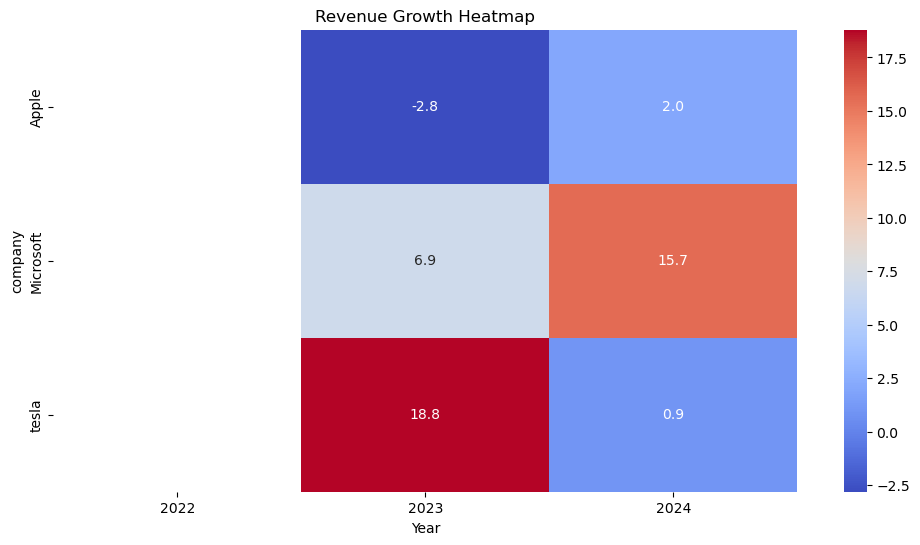

In [33]:
pivot_table = df.pivot(index='company', columns='Year', values='Revenue Growth (%)')
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Revenue Growth Heatmap")
plt.show()


# Visualizing Trends : Revenue Growth Over Time

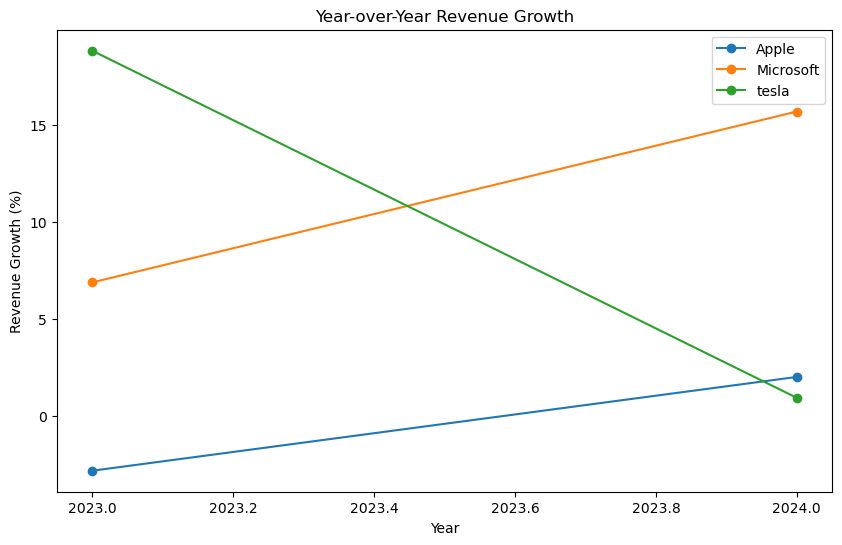

In [35]:
plt.figure(figsize=(10,6))
for company in df['company'].unique():
    subset = df[df['company'] == company]
    plt.plot(subset['Year'], subset['Revenue Growth (%)'], marker='o', label=company)
plt.xlabel('Year')
plt.ylabel('Revenue Growth (%)')
plt.title('Year-over-Year Revenue Growth')
plt.legend()
plt.show()


# Net Income Growth Over Time

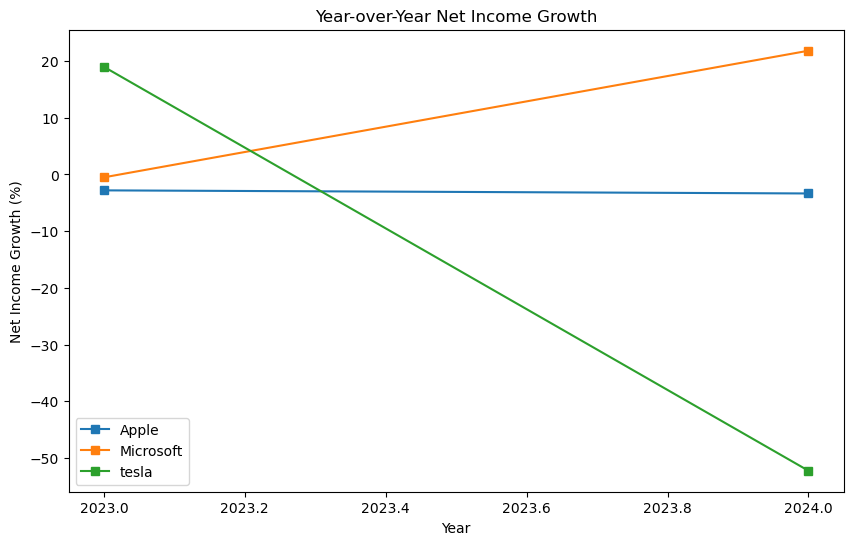

In [37]:
plt.figure(figsize=(10,6))
for company in df['company'].unique():
    subset = df[df['company'] == company]
    plt.plot(subset['Year'], subset['Net Income Growth (%)'], marker='s', label=company)
plt.xlabel('Year')
plt.ylabel('Net Income Growth (%)')
plt.title('Year-over-Year Net Income Growth')
plt.legend()
plt.show()